In [1]:
import numpy as np
import pickle
import open3d as o3d
from spatialmath import *
import transforms3d as t3d 

print('Previous test data position error')
e1 = np.array([0.02,12-11.87,0.07])
e2 = np.array([0.063,0.28,0.07])
e3 = np.array([12-12.34,-0.18,0.04])

print(np.linalg.norm(e1))
print(np.linalg.norm(e2))
print(np.linalg.norm(e3))


Previous test data position error
0.14899664425751408
0.29541326984412875
0.3867815921162742


In [2]:
file1 = open('EE_relative_base.pkl', 'rb')
file2 = open('tracked_robot_base.pkl', 'rb')
file3 = open('tracked_robot_EE.pkl', 'rb')

b_T_EEs = pickle.load(file1)
sb_T_trackedBs = pickle.load(file2)
sb_T_trackedEEs = pickle.load(file3)

In [3]:
#http://www.open3d.org/html/tutorial/Basic/transformation.html
#http://www.open3d.org/docs/latest/tutorial/Advanced/non_blocking_visualization.html

print('sb_T_trackedEE')
meshes = []
for transform in sb_T_trackedEEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    meshes.append(mesh)
o3d.visualization.draw_geometries(meshes[:7])


sb_T_trackedEE


In [4]:
print('b_T_EE')
b_T_EE_meshes = []
for transform in b_T_EEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    b_T_EE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_EE_meshes[:7])

b_T_EE


In [5]:
print('sb_T_trackedEE')
sb_T_trackedEE_meshes = []
for transform in sb_T_trackedEEs:
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    sb_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(sb_T_trackedEE_meshes[:7])

sb_T_trackedEE


In [6]:
print('b_T_trackedEE')
b_T_trackedEE_meshes = []
b_T_trackedEE_ts = []
b_T_trackedEEs = []
for i, transforms in enumerate(zip(sb_T_trackedBs, sb_T_trackedEEs, b_T_EEs)):
    sb_T_trackedB, sb_T_trackedEE, b_T_EE  = transforms
        
    sb_T_trackedB = SE3(sb_T_trackedB)
    sb_T_trackedEE = SE3(sb_T_trackedEE)
    b_T_trackedEE = sb_T_trackedB.inv()*sb_T_trackedEE
    b_T_trackedEE_ts.append(b_T_trackedEE.t)
    b_T_trackedEEs.append(b_T_trackedEE)
    
    diff = b_T_trackedEE-b_T_EE
    print('time step: {}, b_T_trackedEE vs b_T_EE norm: {}'.format(i,np.linalg.norm(diff)))
    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_trackedEE)
    b_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7])


b_T_trackedEE
time step: 0, b_T_trackedEE vs b_T_EE norm: 1.1215493724878604e-16
time step: 1, b_T_trackedEE vs b_T_EE norm: 2.842171048919517e-14
time step: 2, b_T_trackedEE vs b_T_EE norm: 7.105432439796868e-15
time step: 3, b_T_trackedEE vs b_T_EE norm: 3.480952077458736e-14
time step: 4, b_T_trackedEE vs b_T_EE norm: 1.4210856832784214e-14
time step: 5, b_T_trackedEE vs b_T_EE norm: 7.105435827925426e-15
time step: 6, b_T_trackedEE vs b_T_EE norm: 3.469446951953614e-18
time step: 7, b_T_trackedEE vs b_T_EE norm: 1.421085810333339e-14
time step: 8, b_T_trackedEE vs b_T_EE norm: 1.4210854715202004e-14
time step: 9, b_T_trackedEE vs b_T_EE norm: 7.105538794499274e-15
time step: 10, b_T_trackedEE vs b_T_EE norm: 1.4211290083467853e-14
time step: 11, b_T_trackedEE vs b_T_EE norm: 1.4211290083467853e-14


In [7]:
print('looking at rotation motions')
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[8:])


looking at rotation motions


In [8]:
from spatialmath.base import trnorm
w_T_fkEEs = []

print('w_T_EE: origin')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +x 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.289],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -x 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.309],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +y 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.804],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -y 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.824],[-0.009, 0.055, -0.998, 1.164],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: +z 10mm') #just swapped this with the one before, z should go up in the world frame not down!
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.174],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)

print('w_T_EE: -z 10mm')
w_T_fkEE = np.array([[-0.998, 0.058, 0.012, -0.299],[0.058, 0.997, 0.054, -1.814],[-0.009, 0.055, -0.998, 1.154],[0,0,0,1]])
w_T_fkEE[:3,3]*=1000
w_T_fkEE = trnorm(w_T_fkEE) #hand typed in matrices aren't proper, det != 1
w_T_fkEE = SE3(w_T_fkEE)
w_T_fkEEs.append(w_T_fkEE)
print(w_T_fkEE)


print('showing as meshes in open3d')
w_T_fkEE_meshes = []
for transform in w_T_fkEEs:
    #print(transform)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(transform)
    w_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(w_T_fkEE_meshes[:7])

w_T_EE: origin
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +x 10mm
  -0.9982    0.05799   0.01201  -289       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: -x 10mm
  -0.9982    0.05799   0.01201  -309       
   0.05856   0.9968    0.05403  -1814      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +y 10mm
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1804      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: -y 10mm
  -0.9982    0.05799   0.01201  -299       
   0.05856   0.9968    0.05403  -1824      
  -0.008834  0.05463  -0.9985    1164      
   0         0         0         1         

w_T_EE: +z 10mm
  -0.9982    0.05799

In [9]:
from spatialmath.base import trnorm
print('b_T_fkEE')
b_T_fkEE_meshes = []
w_T_fkEE_ts = []
for w_T_fkEE in w_T_fkEEs:
    w_T_fkEE_ts.append(w_T_fkEE.t)

    w_T_b = np.array([[0.089, -0.043, 0.995, -0.21],
                      [0.991, 0.108, 0.084, -1.87],
                      [0.104, -0.993, 0.053, 0.98],
                      [0, 0, 0, 1]])
    w_T_b[:3,3]*=1000
    w_T_b = trnorm(w_T_b)  #hand typed in matrices aren't proper, det != 1
    w_T_b = SE3(w_T_b)
    b_T_fkEE = w_T_b.inv()*w_T_fkEE    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_fkEE)
    b_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_fkEE_meshes[:7])

b_T_fkEE


[[-1.13764893e-02  9.99031056e-01  4.25150022e-02  1.81652157e+03]
 [ 6.92022276e-02  4.32024280e-02 -9.96666746e-01  1.03813528e+03]
 [-9.97537782e-01 -8.39643574e-03 -6.96266665e-02 -1.46758667e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Points A
[[  57.16827005 -221.0454809    85.69082476]
 [  57.05450516 -220.35345862   75.71544693]
 [  57.28203494 -221.73750317   95.66620258]
 [  67.15858061 -220.61345662   85.6068604 ]
 [  47.17795949 -221.47750518   85.77478911]
 [  57.59342007 -231.01214835   84.99455809]
 [  56.74312003 -211.07881344   86.38709142]]

Points B
[[  57.3119444  -221.1184821    85.70552275]
 [  57.18046008 -220.3381416    75.78432203]
 [  57.29073299 -221.72148281   95.59278708]
 [  67.50472448 -220.65249379   85.54366157]
 [  46.78834732 -221.4258365    85.84247807]
 [  57.54196275 -231.00931872   84.98778685]
 [  56.55971834 -211.05261076   86.37921494]]

RMSE: 0.23121476807523925
Hmm something doesn't look right ...


<IPython.core.display.Javascript object>


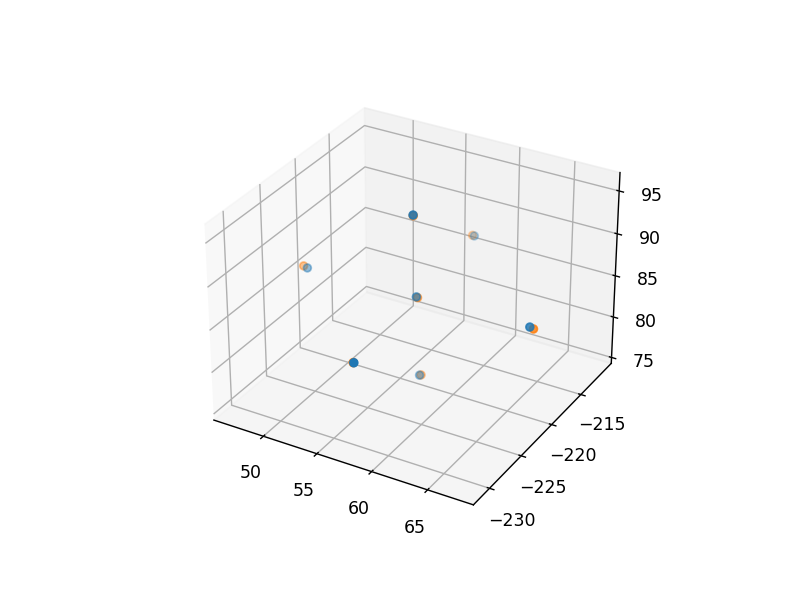

In [10]:
import numpy as np
from rigid_transform_3D import rigid_transform_3D
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

%matplotlib notebook


def find_base_transform_homogeneous(point_set_1, point_set_2):
    '''
    description: finds homogeneous base transform to transform point_set_1 to point_set_2
    
    
    input: two numpy arrays, shape is [nx3] 
    output: homogeneous transform (4x4) numpy array
    '''
    ret_R, ret_t = rigid_transform_3D(point_set_1.T, point_set_2.T)
    transform = np.eye(4)
    transform[:3,:3] = ret_R
    transform[:3,3] = ret_t.squeeze()
    
    return transform.copy()

source = np.array(w_T_fkEE_ts[:7])
target = np.array(b_T_trackedEE_ts[:7])
base_transform = find_base_transform_homogeneous(source,target)
print(base_transform)


source_stacked=np.hstack((source,np.ones(source.shape[0])[:, None]))
# Compare the recovered R and t with the original
source_transformed = (base_transform@source_stacked.T).T[:,:3]


# Find the root mean squared error
n = source_transformed.shape[0]
err = source_transformed - target
err = err * err
err = np.sum(err)
rmse = np.sqrt(err/n)

print("Points A")
print(source_transformed)
print("")

print("Points B")
print(target)
print("")

print("RMSE:", rmse)

if rmse < 1e-5:
    print("Everything looks good!")
else:
    print("Hmm something doesn't look right ...")
    
fig = plt.figure()
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
ax.scatter3D(source_transformed[:,0], source_transformed[:,1], source_transformed[:,2], cmap='Greens');
ax.scatter3D(target[:,0], target[:,1], target[:,2], cmap='Greens');

In [14]:
from spatialmath.base import trnorm
print('b_T_fkEE')
b_T_fkEE_meshes = []
w_T_fkEE_ts = []
b_T_fkEEs = []
w_T_fkEE_meshes = []
for w_T_fkEE in w_T_fkEEs:
    w_T_fkEE_ts.append(w_T_fkEE.t)

#     w_T_b = np.array([[0.089, -0.043, 0.995, -0.21],
#                       [0.991, 0.108, 0.084, -1.87],
#                       [0.104, -0.993, 0.053, 0.98],
#                       [0, 0, 0, 1]])
#     w_T_b[:3,3]*=1000
    b_T_w = trnorm(base_transform)  #hand typed in matrices aren't proper, det != 1
    b_T_w = SE3(b_T_w)
    b_T_fkEE = b_T_w*w_T_fkEE*SE3.Rz(90,'deg')    
    b_T_fkEEs.append(b_T_fkEE)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(b_T_fkEE)
    b_T_fkEE_meshes.append(mesh)
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_fkEE)
    w_T_fkEE_meshes.append(mesh)
o3d.visualization.draw_geometries(b_T_fkEE_meshes)

b_T_fkEE


In [15]:
print('plotting FK and tracked b_T_ee')
o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7]+b_T_fkEE_meshes[:7])

# o3d.visualization.draw_geometries(b_T_trackedEE_meshes[:7])
# o3d.visualization.draw_geometries(b_T_fkEE_meshes[:7])

plotting FK and tracked b_T_ee


In [16]:
print('w_T_trackedEE')
w_T_trackedEE_meshes = []
w_T_trackedEEs = []
for i, transforms in enumerate(zip(sb_T_trackedBs, sb_T_trackedEEs, b_T_EEs)):
    sb_T_trackedB, sb_T_trackedEE, b_T_EE  = transforms
        
    sb_T_trackedB = SE3(sb_T_trackedB)
    sb_T_trackedEE = SE3(sb_T_trackedEE)
    b_T_trackedEE = sb_T_trackedB.inv()*sb_T_trackedEE
    
    trackedEE_T_fkEE = SE3.Rz(-90,'deg')*SE3.Rx(-2.4,'deg')*SE3.Ry(0.2,'deg')
    w_T_b = b_T_w.inv()
    w_T_trackedEE = w_T_b*b_T_trackedEE*trackedEE_T_fkEE
    w_T_trackedEEs.append(w_T_trackedEE)
    
    mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_trackedEE)
    w_T_trackedEE_meshes.append(mesh)
o3d.visualization.draw_geometries(w_T_trackedEE_meshes[:7])

w_T_trackedEE


In [17]:
o3d.visualization.draw_geometries(w_T_fkEE_meshes[:7]+w_T_trackedEE_meshes[:7])

In [18]:
def calc_p_error(p_target,p_current):
    """
    This function calucated the postion difference between target and where the robot is currently are.
    Args:
        p_target(np.array of 1x3 vector): the postion of the target desired
        p_current(np.array of 1x3 vector): the postion of the current robot
    Returns:
        error(np.array of 1x3 vector): the error in x,y,z deirection.
    """
    error = p_target.reshape((3,1))-p_current.reshape((3,1))
    return error

def calc_needle_ori_error(R_target, R_current):
    '''
    calculates axis-angle between target and current rotation matrices for robot EE control
    inputs:
        R_target: [3x3] SO3 rotation matrix numpy array for target rotation matrix
        R_current: [3x3] SO3 rotation matrix numpy array for current rotation matrix
    returns:
        [3x1] axis-angle orientation error where the magnitude is the rotation in radians around the axis
    '''
    target_vec = R_target[:,2]
    current_vec = R_current[:,2]
    normal = np.cross(target_vec, current_vec)
    normal /= np.linalg.norm(normal)
    projected = target_vec @ current_vec / (np.linalg.norm(target_vec)*np.linalg.norm(current_vec))
    angle = -np.arccos(projected).squeeze()
    axis = normal.squeeze()
    return axis*angle



In [19]:
print('marker base frame error: ')
for i, transforms in enumerate(zip(b_T_fkEEs, b_T_trackedEEs)):
    b_T_trackedEE, b_T_fkEE  = transforms
    p_error = calc_p_error(b_T_fkEE.t,b_T_trackedEE.t)
    ori_needle_error = calc_needle_ori_error(b_T_fkEE.R,b_T_trackedEE.R)
    ori_euler_error = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)


marker base frame error: 
Time step: 0
Postion Error norm (mm):  0.16182560728380724
Rotational Error norm(deg):  2.3444433928801995
Time step: 1
Postion Error norm (mm):  0.14437116135367312
Rotational Error norm(deg):  2.418750936472859
Time step: 2
Postion Error norm (mm):  0.07564485466652433
Rotational Error norm(deg):  2.391164786507806
Time step: 3
Postion Error norm (mm):  0.3540248182689838
Rotational Error norm(deg):  2.3997339934835424
Time step: 4
Postion Error norm (mm):  0.39880959919256764
Rotational Error norm(deg):  2.382328057415318
Time step: 5
Postion Error norm (mm):  0.051978003380488955
Rotational Error norm(deg):  2.2651556737886906
Time step: 6
Postion Error norm (mm):  0.18543138406867807
Rotational Error norm(deg):  2.3529044597767794


In [20]:
print('robot world frame error: ')
for i, transforms in enumerate(zip(w_T_fkEEs, w_T_trackedEEs)):
    w_T_fkEE, w_T_trackedEE  = transforms
    #deltaR = SE3.Rx(2.4,'deg')*SE3.Ry(-0.2,'deg')
    #w_T_trackedEE *= deltaR
    p_error = calc_p_error(w_T_fkEE.t,w_T_trackedEE.t)
    ori_needle_error = calc_needle_ori_error(w_T_fkEE.R,w_T_trackedEE.R)
    ori_euler_error = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)

file = open('w_T_b.pkl', 'wb')
pickle.dump(w_T_b, file)
file.close()
file = open('trackedEE_T_fkEE.pkl', 'wb')
pickle.dump(trackedEE_T_fkEE, file)
file.close()


robot world frame error: 
Time step: 0
Postion Error norm (mm):  0.16182560728384604
Rotational Error norm(deg):  0.08554873643486464
Time step: 1
Postion Error norm (mm):  0.14437116135352682
Rotational Error norm(deg):  0.09257643298128963
Time step: 2
Postion Error norm (mm):  0.07564485466648703
Rotational Error norm(deg):  0.01758151891110112
Time step: 3
Postion Error norm (mm):  0.3540248182689476
Rotational Error norm(deg):  0.046555795120888255
Time step: 4
Postion Error norm (mm):  0.39880959919283776
Rotational Error norm(deg):  0.06188484580346925
Time step: 5
Postion Error norm (mm):  0.051978003380328604
Rotational Error norm(deg):  0.14661032705876206
Time step: 6
Postion Error norm (mm):  0.18543138406854195
Rotational Error norm(deg):  0.07340758362479188


## CHECKING CONTROLLER ON ORIENTATION BASED ON FK TRANSFORMS

In [21]:
import numpy as np
import pickle
import open3d as o3d
from spatialmath import *
from spatialmath.base import trnorm
from spatialmath.base import q2r, r2q
import transforms3d as t3d 

file4 = open('FK_robot_tip.pkl', 'rb')
w_T_tns_orig = pickle.load(file4)

w_T_tns = []
T = np.array(w_T_tns_orig[7])
T = trnorm(T)
T = SE3(T)
w_T_tns.append(T*SE3.Tz(-10))
print(w_T_tns[0])

#print(w_T_tns[6])
T = np.array([[-0.98, 0.071, 0.185, -0.299],
              [0.082, 0.995, 0.055, -1.814],
              [-0.18, 0.069, -0.981, 1.164],
              [0,0,0,1]])
T[:3,3]*=1000
T = trnorm(T) #hand typed in matrices aren't proper, det != 1
w_T_tns.append(SE3(T)*SE3.Tz(-10))
print(w_T_tns[1])

T = np.array([[-0.986, 0.043, -0.162, -0.299],
              [0.034, 0.998, 0.054, -1.814],
              [0.163, 0.048, -0.985, 1.164],
              [0,0,0,1]])
T[:3,3]*=1000
T = trnorm(T) #hand typed in matrices aren't proper, det != 1
w_T_tns.append(SE3(T)*SE3.Tz(-10))
print(w_T_tns[2])

# T = np.array([[-0.998, 0.057, 0.012, -0.299],
#               [0.058, 0.988, 0.141, -1.814],
#               [-0.004, 0.142, -0.99, 1.164],
#               [0,0,0,1]])
T = np.array([[-0.998, 0.057, 0.012, -0.299],
              [0.058, 0.988, 0.141, -1.814],
              [-0.004, 0.142, -0.99, 1.164],
              [0,0,0,1]])
T[:3,3]*=1000
T = trnorm(T) #hand typed in matrices aren't proper, det != 1
w_T_tns.append(SE3(T)*SE3.Tz(-10))
print(w_T_tns[3])

# T = np.array([[-0.998, 0.057, 0.012, -0.299],
#               [0.058, 0.988, 0.141, -1.814],
#               [-0.004, 0.142, -0.99, 1.164],
#               [0,0,0,1]])
T = np.array([[-0.998, 0.059, 0.012, -0.299],
              [0.058, 0.988, -0.033, -1.814],
              [-0.014, -0.032, -0.99, 1.164],
              [0,0,0,1]])
T[:3,3]*=1000
T = trnorm(T) #hand typed in matrices aren't proper, det != 1
w_T_tns.append(SE3(T)*SE3.Tz(-10))
print(w_T_tns[4])

w_T_tn_meshs = []

for w_T_tn in w_T_tns[:]:
    w_T_tn_mesh = o3d.geometry.TriangleMesh.create_coordinate_frame().transform(w_T_tn*SE3.Tz(0))
    w_T_tn_meshs.append(w_T_tn_mesh)

o3d.visualization.draw_geometries(w_T_tn_meshs)



  -0.9982    0.05799   0.01201  -299.1     
   0.05856   0.9968    0.05403  -1815      
  -0.008834  0.05463  -0.9985    1174      
   0         0         0         1         

  -0.9802    0.07097   0.185    -300.9     
   0.08244   0.9951    0.05501  -1815      
  -0.1802    0.06917  -0.9812    1174      
   0         0         0         1         

  -0.9858    0.04294  -0.162    -297.4     
   0.03459   0.9979    0.05402  -1815      
   0.164     0.04765  -0.9853    1174      
   0         0         0         1         

  -0.9983    0.05702   0.012    -299.1     
   0.05814   0.9883    0.141    -1815      
  -0.00382   0.1414   -0.9899    1174      
   0         0         0         1         

  -0.9981    0.05958   0.01211  -299.1     
   0.05915   0.9977   -0.03331  -1814      
  -0.01407  -0.03253  -0.9994    1174      
   0         0         0         1         



In [21]:
print('robot world frame error between first and last transform for orientation: ')
for i, w_T_fkEE in enumerate(w_T_tns[1:]):
    #deltaR = SE3.Rx(2.4,'deg')*SE3.Ry(-0.2,'deg')
    #w_T_trackedEE *= deltaR
    p_error = calc_p_error(w_T_tns[0].t,w_T_fkEE.t)
    ori_needle_error = calc_needle_ori_error(w_T_tns[0].R,w_T_fkEE.R)
    r,p,y = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Position Error (mm): {}".format(p_error))
    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)
    print("Rotational Error euler(deg): r{},p{},y{}".format(r*180/np.pi, p*180.0/np.pi, y*180.0/np.pi))

robot world frame error between first and last transform for orientation: 
Time step: 0
Postion Error norm (mm):  1.7389352946733825
Position Error (mm): [[1.73030373]
 [0.00985411]
 [0.17276532]]
Rotational Error norm(deg):  9.975961629890913
Rotational Error euler(deg): r-0.0642033646088879,p9.961222154304288,y0.5333995701951233
Time step: 1
Postion Error norm (mm):  1.7455257951156007
Position Error (mm): [[-1.74055458e+00]
 [-8.67709182e-05]
 [ 1.31643649e-01]]
Rotational Error norm(deg):  10.013866509005291
Rotational Error euler(deg): r0.006985675236765176,p-9.999174060099314,y-0.5435114055453758
Time step: 2
Postion Error norm (mm):  0.8738315543512671
Position Error (mm): [[-6.36987521e-05]
 [ 8.69658986e-01]
 [ 8.52926133e-02]]
Rotational Error norm(deg):  5.008280299076111
Rotational Error euler(deg): r-5.007920813343511,p0.0028857660316802063,y-0.060081709762580135
Time step: 3
Postion Error norm (mm):  0.8734242259992353
Position Error (mm): [[ 0.00107975]
 [-0.87337676]
 [

## Checking robot controller on the FK data

In [22]:
Kp_pos = 0.5
Kp_ori = 0.5

w_T_tn_corrected_meshes = []

print('robot world frame error between first and last transform for orientation after correction to check controller: ')
for i, w_T_fkEE in enumerate(w_T_tns[1:]):
    
    #calculate error term --> used as correction and scale by controller gain
    p_error = Kp_pos*calc_p_error(w_T_tns[0].t,w_T_fkEE.t)
    ori_needle_error = Kp_ori*calc_needle_ori_error(w_T_tns[0].R,w_T_fkEE.R)
    
    r,p,y = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))

    print("Position Correction (mm): {}".format(p_error))
    print("Rotational Correction euler(deg): r{},p{},y{}".format(r*180/np.pi, p*180.0/np.pi, y*180.0/np.pi))
    
    #perform virtual addition to see if the error decreases correction
    p_correction = p_error.squeeze()
    ori_correction = t3d.euler.euler2mat(r,p,y)
    ori_correction = trnorm(ori_correction)
    ori_correction = SO3(ori_correction)
    R_corrected = ori_correction*w_T_fkEE.R
    t_corrected = p_correction + w_T_fkEE.t
    T_corrected = np.eye(4)
    T_corrected[:3,:3] = R_corrected
    T_corrected[:3,3] = t_corrected
    T_corrected = SE3(T_corrected)
    w_T_tn_corrected_mesh = o3d.geometry.TriangleMesh.create_coordinate_frame(size=0.5).transform(T_corrected)
    w_T_tn_corrected_meshes.append(w_T_tn_corrected_mesh)
    
    p_error = calc_p_error(w_T_tns[0].t,t_corrected)
    ori_needle_error = calc_needle_ori_error(w_T_tns[0].R,R_corrected)
    r,p,y = t3d.euler.axangle2euler(ori_needle_error/np.linalg.norm(ori_needle_error), np.linalg.norm(ori_needle_error))
    
    #print("Postion Error vector(mm): ", p_error)
    print('Time step: {}'.format(i))
    print("Postion Error norm (mm): ", np.linalg.norm(p_error))
    print("Position Error (mm): {}".format(p_error))

    print("Rotational Error norm(deg): ", np.linalg.norm(ori_needle_error)*180/np.pi)
    print("Rotational Error euler(deg): r{},p{},y{}".format(r*180/np.pi, p*180.0/np.pi, y*180.0/np.pi))
    
o3d.visualization.draw_geometries(w_T_tn_corrected_meshes+w_T_tn_meshs)


robot world frame error between first and last transform for orientation after correction to check controller: 
Position Correction (mm): [[0.86515187]
 [0.00492705]
 [0.08638266]]
Rotational Correction euler(deg): r-0.0436231480583797,p4.980536684958892,y0.26709039097153103
Time step: 0
Postion Error norm (mm):  0.8694676473366636
Position Error (mm): [[0.86515187]
 [0.00492705]
 [0.08638266]]
Rotational Error norm(deg):  4.9879808149454075
Rotational Error euler(deg): r-0.04362314805837934,p4.980536684958863,y0.26709039097152937
Position Correction (mm): [[-8.70277290e-01]
 [-4.33854591e-05]
 [ 6.58218243e-02]]
Rotational Correction euler(deg): r-0.00842996513932966,p-4.999595158425994,y-0.27056473900098266
Time step: 1
Postion Error norm (mm):  0.8727628975578201
Position Error (mm): [[-8.70277290e-01]
 [-4.33854591e-05]
 [ 6.58218243e-02]]
Rotational Error norm(deg):  5.00693325450259
Rotational Error euler(deg): r-0.008429965139330059,p-4.999595158425938,y-0.2705647390009795
Posit

## Load and plot CT scans with tracking for orientation
We want to visually check that the motions look like what we expect based on the CT slices (in slack) and the previous motion from FK plotting. It seems like only 3 motions worked

In [27]:
#Test notebook for tracking rigid body  marker consisting of multiple fiducials within a CT scan volume

#3D data processing
import open3d as o3d
import ct_tracking_library # our helper functions
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import os
from ipywidgets import interact, fixed

#our processing code
from ct_tracking_library.ct_motor_functions import *
from ct_tracking_library.ct_tracking_functions import *
from ct_tracking_library.ct_processing_functions import *
from ct_tracking_library.ct_display_functions import *
from ct_tracking_library.ct_object_classes import *
from ct_tracking_library.ct_fk_functions import *

#used for GUI
%matplotlib notebook

#find transform
import datetime
import time
import pickle
from spatialmath import *
from roboticstoolbox import ET as E
import transforms3d as t3d
import itertools
from spatialmath.base import trnorm

In [28]:
def get_marker(data_directory,time,v = False, debug = False):
    """
    This function finds the marker from the user sleceted dicom file:

    Args:
        selected_series(string): the serial key for the slected DICOM.
        time(Time): time intial when the function is called.
        v(bool): to show visualization for the marker
        debug(bool): wheather or not the user want to see debug info.

    Returns:
        M_list[0](Marker): the moveing marker object finded
        M_list[1](Marker): the fixed marker object finded
        v_mesh(Open3d mesh): the mesh used for finding the marker in form of open3d

    """
    M_list = []
    file_reader = sitk.ImageFileReader()
    series_file_names = {}
    series_IDs = list(sitk.ImageSeriesReader_GetGDCMSeriesIDs(data_directory))
    print(series_IDs)
    selected_series = series_IDs[0]

    if series_IDs:
        for series in series_IDs:
            series_file_names[series] = sitk.ImageSeriesReader_GetGDCMSeriesFileNames(data_directory, series)
    for S in range(2):
        # pick marker
        if S == 0:
            target_marker_name = 'moving_marker_1_DoF'
            #marker = np.array([[-10,-5,0],[-10,5,0],[0,-5,0],[10,0,0]])
            marker = np.load('./test_data/marker1.npy')
            R = np.eye(3)
            crop_z = None
        else:
            target_marker_name = 'fixed_marker_1_DoF'
            #marker = np.array([[0,-14,0],[0,-6,0],[0,16,0],[17,0,0]])
            marker = np.load('./test_data/marker2.npy')
            R = np.eye(3)
            crop_z = None

        #convert scan to mesh for finding markers via thresholding
        scan_file = series_file_names[series_IDs[0]]
        convert_scan_to_mha(scan_file, crop_z = crop_z)
        convert_mha_to_mesh(output_mesh_file = 'temp_mesh.obj')

        #find candidate fiducials within the scanner returning clustered centroids that could be rigid body markers
        _, marker_centroid_coordinates, pcd_selected, marker_mesh, _, good_centroid_clusters = find_candidate_centroids(marker = marker, debug=debug)
        if debug:
            print('marker centroid coordinates from design: {}'.format(marker))
            print('found centroid coordinates: {}'.format(marker_centroid_coordinates))

        #display candidate fiducials
        if v:
            o3d.visualization.draw_geometries([pcd_selected, marker_mesh])

        #find best transform and marker from candidate fiducials
        tracked_R, tracked_t, permuted_centroids, min_error = find_best_transform_from_candidate_marker_clusters(marker, good_centroid_clusters)

        #get rid of column of ones to make 3xN
        permuted_centroids = permuted_centroids[:3,:].T

        #transform marker geometry coordinates using found transform to tracked image coordinates
        transformed_marker = (tracked_R @ marker.T + tracked_t).T
        error = permuted_centroids-transformed_marker
        
        #tracking error from final transform
        np.set_printoptions(2)
        print("Error (mm): {}".format(error))
        print("Error norm (mm): {}".format(np.linalg.norm(error)))
        if v:
            #create o3d visualizations
            marker_3d_tracked = create_marker_visualization(fiducial_coordinates=permuted_centroids, color=[0.8, 0.2, 0.2])
            marker_3d_base = create_marker_visualization(marker, [0.2, 0.8, 0.2])
            marker_3d_base.append(create_coordinate_frame_visualization())
            marker_3d_transformed = create_marker_visualization(marker, [0.2, 0.2, 0.8], tracked_R, tracked_t)
            marker_3d_transformed.append(create_coordinate_frame_visualization(tracked_R, tracked_t))
            #visualize tracked markers on top of mesh used for tracking
            visualization_list2 = marker_3d_tracked+marker_3d_base+marker_3d_transformed + [marker_mesh]
            visualization_list1 = copy.deepcopy(visualization_list2)
            o3d.visualization.draw_geometries(visualization_list2)
        if S == 0:
            v_mesh= marker_mesh
        #append marker
        print("T find: ",tracked_t)
        M_list.append(Marker(name=target_marker_name,d_key=selected_series,time =time,geometry=marker,T=SE3(t2T(tracked_R, tracked_t)),error=np.linalg.norm(error, axis=1)))
        
    return M_list[0],M_list[1],v_mesh

In [29]:
data_directory1 = "./test_data/74904FF8_Series7"
data_directory2 = "./test_data/DA248E57_Series8"
data_directory3 = "./test_data/E6DF77CB_Series9"
data_directory4 = "./test_data/4606EC16_Series10"
u_list = [data_directory1,data_directory2,data_directory3,data_directory4]

#marker1,marker2,mesh = get_marker(data_directory1,0)
#o3d.visualization.draw_geometries(marker1+marker2+[mesh])

new_data = {}
mesh_l=[]
for x in range(len(u_list)):
    selected_keys = u_list[x]
    name = 'scan'+str(x)
    marker1,marker2,mesh = get_marker(selected_keys,0)
    mesh_l.append(mesh)
    robot = 0
    append_value(new_data, "scan"+str(x), marker1)
    append_value(new_data, "scan"+str(x), marker2)
    append_value(new_data, "scan"+str(x), robot)

['1.2.840.113619.2.416.13212203759717164379746404795633111747']
spacing:  [0.625    0.976563 0.976563]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.687 -250.    -250.   ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-145, -999]
extreme simple itk pixels: [-145, -999]
verts shape: (98018, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=411
[Op

  0%|                                                                                           | 0/33 [00:00<?, ?it/s]C:\Users\derek\Documents\GitHub\ct-fiducial-tracking\ct_tracking_library\ct_tracking_functions.py:422: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  C, residules, rank, singval = np.linalg.lstsq(A,f)
100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 242.65it/s]


[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
Everything looks good!
Error (mm): [[-4.86e-02 -8.35e-05 -2.85e-03]
 [ 2.51e-02 -1.27e-04  2.37e-03]
 [ 4.09e-02  2.85e-04  1.62e-02]
 [-1.73e-02 -7.53e-05 -1.57e-02]]
Error norm (mm): 0.07409137997379107
T find:  [[  -0.14]
 [-118.93]
 [ -69.99]]
spacing:  [0.62 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-145, -999]
extreme simple itk pixels: [-145, -999]
verts shape: (98018, 3)
verts type: <class 'numpy.ndarray'>
[Open3D I

100%|█████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 306.93it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters


Everything looks good!
Error (mm): [[-1.62e-02 -7.85e-01  5.61e-04]
 [ 6.60e-03  6.43e-01  1.26e-02]
 [-2.92e-02  2.83e-02  3.59e-02]
 [-1.33e-02 -3.78e-01 -1.37e-02]
 [ 5.22e-02  4.92e-01 -3.54e-02]]
Error norm (mm): 1.1927896951886883
T find:  [[ 103.37]
 [  87.7 ]
 [-112.34]]
['1.2.840.113619.2.416.111317982424167783903258248398686375555']
spacing:  [0.65 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 247
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (247, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.335865853658504)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-129, -997]
extreme simple itk pixels: [-129, -997]
verts shape: (93408, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping n

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 269.57it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 5
point cloud has 5 clusters
Everything looks good!
Error (mm): [[-0.04 -0.06  0.27]
 [ 0.06 -0.07  0.27]
 [-0.    0.02 -0.11]
 [-0.02  0.1  -0.43]]


C:\Users\derek\Documents\GitHub\ct-fiducial-tracking\ct_tracking_library\ct_tracking_functions.py:399: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return copy.deepcopy(marker), copy.deepcopy(marker_centroid_coordinates), copy.deepcopy(pcd_selected), copy.deepcopy(mesh), copy.deepcopy(coordinate_frame), np.array(good_centroid_clusters)#, np.array(marker_centroid_coordinates_list)



Error norm (mm): 0.6049643438128398
T find:  [[  -0.62]
 [-141.19]
 [ -52.7 ]]
spacing:  [0.65 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 247
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (247, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.335865853658504)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-129, -997]
extreme simple itk pixels: [-129, -997]
verts shape: (93408, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=396
[O

100%|█████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 292.45it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 5
point cloud has 5 clusters
Everything looks good!
Error (mm): [[-0.02 -0.79  0.29]
 [ 0.01  0.64  0.33]
 [-0.02  0.02  0.42]
 [-0.02 -0.37 -0.59]
 [ 0.05  0.5  -0.45]]
Error norm (mm): 1.5304864842862247
T find:  [[ 103.34]
 [  87.71]
 [-110.87]]


['1.2.840.113619.2.416.479020457323529061902399788213082967']
spacing:  [0.62 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-165, -1002]
extreme simple itk pixels: [-165, -1002]
verts shape: (97912, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=399
[Open3D DEBUG] Pre

100%|█████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 321.10it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
Everything looks good!
Error (mm): [[-5.02e-02 -2.81e-03  1.47e-02]
 [ 2.06e-02 -3.08e-05  1.35e-02]
 [ 6.21e-02  4.43e-03 -3.97e-03]
 [-3.26e-02 -1.59e-03 -2.43e-02]]
Error norm (mm): 0.0943075059342556
T find:  [[   1.  ]
 [-127.99]
 [ -72.38]]


spacing:  [0.62 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-165, -1002]
extreme simple itk pixels: [-165, -1002]
verts shape: (97912, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=399
[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[

100%|█████████████████████████████████████████████████████████████████████████████████| 35/35 [00:00<00:00, 324.07it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
Everything looks good!
Error (mm): [[-1.52e-02 -7.88e-01  4.07e-04]
 [ 6.22e-03  6.45e-01  1.40e-02]
 [-2.98e-02  2.88e-02  3.48e-02]
 [-1.44e-02 -3.80e-01 -1.31e-02]
 [ 5.32e-02  4.94e-01 -3.61e-02]]
Error norm (mm): 1.1969780626208644
T find:  [[ 103.37]
 [  87.68]
 [-112.31]]


['1.2.840.113619.2.416.180413688580824154067336222425429839619']
spacing:  [0.62 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-149, -1005]
extreme simple itk pixels: [-149, -1005]
verts shape: (95640, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done computing triangle adjacency
[Open3D DEBUG] [ClusterConnectedTriangles] Done clustering, #clusters=390
[Open3D DEBUG] 

100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 285.71it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters


Everything looks good!
Error (mm): [[-4.24e-02  8.52e-04 -2.73e-02]
 [ 1.51e-02 -6.09e-05  6.71e-04]
 [ 4.81e-02 -2.49e-03  4.20e-02]
 [-2.08e-02  1.70e-03 -1.54e-02]]
Error norm (mm): 0.08681210220084848
T find:  [[  -0.96]
 [-129.74]
 [ -68.61]]
spacing:  [0.62 0.98 0.98]
image shape in sitk (x,y,z): width 512 then height 512 then depth 256
 origin:  [-149.69 -250.   -250.  ]
numpy version shape: (z,y,x) (256, 512, 512)
locations of different pixels in image [(-250.0, -250.0, -149.687), (250.00025599999998, 250.00025599999998, 10.312999999999988)]
there math https://discourse.itk.org/t/solved-transformindextophysicalpoint-manually/1031/10
perhpas mcubes mirrors?
extreme simple itk pixels: [-149, -1005]
extreme simple itk pixels: [-149, -1005]
verts shape: (95640, 3)
verts type: <class 'numpy.ndarray'>
[Open3D INFO] Skipping non-triangle primitive geometry of type: 1
[Open3D INFO] Skipping non-triangle primitive geometry of type: 2
[Open3D DEBUG] [ClusterConnectedTriangles] Compute tr

100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [00:00<00:00, 296.30it/s]

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 4
point cloud has 4 clusters
Everything looks good!
Error (mm): [[-2.21e-02 -7.86e-01 -3.64e-04]
 [ 1.02e-02  6.45e-01  1.61e-02]
 [-2.77e-02  2.73e-02  3.67e-02]
 [-1.25e-02 -3.78e-01 -1.56e-02]
 [ 5.20e-02  4.92e-01 -3.69e-02]]
Error norm (mm): 1.1946402437389856
T find:  [[ 103.36]
 [  87.74]
 [-112.36]]


In [30]:
def display_o3d_track(l1,l2,mesh=None):
    v_list = []
    for i in range(len(l1)):
        marker = np.load('./test_data/marker2.npy')
        marker_3d_transformed = create_marker_visualization(marker, [0.8, 0.8, 0.2], l2[i].R, l2[i].t.reshape((3,1)))
        marker_3d_transformed.append(create_coordinate_frame_visualization(l2[i].R, l2[i].t.reshape((3,1))))
        marker = np.load('./test_data/marker1.npy')
        marker_3d_target = create_marker_visualization(marker, [0.2, 0.8, 0.8],l1[i].R, l1[i].t.reshape((3,1)))
        marker_3d_target.append(create_coordinate_frame_visualization(l1[i].R, l1[i].t.reshape((3,1))))
        if i == 0:
            v_list = marker_3d_transformed + marker_3d_target
        else:
            v_list += marker_3d_transformed + marker_3d_target
    if mesh is not None:
        o3d.visualization.draw_geometries(v_list+[mesh])
    else:
        o3d.visualization.draw_geometries(v_list)

In [31]:
# load the marker transform to list
Tee_list = []
Tb_list = []
Tr_list = []
for x in new_data:
    Tee = new_data[x][0].T
    Tee_list.append(Tee)
    Tb = new_data[x][1].T
    Tb_list.append(Tb)
    
for x in mesh_l:
    display_o3d_track(Tee_list, Tb_list, x)

[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


## Once we are happy with above, plot the FK overlayed on the same scans using the base transform found previously in this notebook

b_T_fkEE = b_T_w*w_T_fkEE*trackedEE_T_fkEE

In [31]:
print('Plotting!')
print('World to Base: {}'.format(w_T_b))
print('trackedEE to fkEE: {}'.format(trackedEE_T_fkEE))

Plotting!
World to Base:   -0.01138   0.0692   -0.9975   -197.6     
   0.999     0.0432   -0.008396 -1861      
   0.04252  -0.9967   -0.06963   947.2     
   0         0         0         1         

trackedEE to fkEE:   -0.0001462  0.9991    0.04188   0         
  -1         0        -0.003491  0         
  -0.003488 -0.04188   0.9991    0         
   0         0         0         1         



## Once we have good alignment, (good enough), apply the control law from above in the notebook based on the tracking scans and compare it with the control law motions based on FK, they should look reasonable.

In [28]:
print('Plotting')

Plotting


## Now we want to have the true target transform we found in our last test, and set that as the target setpoint and use the control law + see the motion looks right.

### Question: Should we transform everything into the robot base frame even for visualization? If we can in the end, its better, but its OK not to and simpler not to for now --> we should not do it yet.

In [30]:
print('Plotting')

Plotting
